# Exploration des données

In [39]:
import pandas as pd
import my_functions as mf
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas.api.types import CategoricalDtype
from scipy import stats
import numpy as np
import importlib
importlib.reload(mf)

<module 'my_functions' from "c:\\Users\\Maeva\\Documents\\OpenClassRoom\\P12 - Gérer un projet d'infrastructure\\notebooks\\my_functions.py">

## Dataset RH

### Import du dataset

In [25]:
df = pd.read_excel("../data/donnees_rh.xlsx")

### Informations générales

In [26]:
df.shape

(161, 11)

In [27]:
df.head()

,ID salarié,Nom,Prénom,Date de naissance,BU,Date d'embauche,Salaire brut,Type de contrat,Nombre de jours de CP,Adresse du domicile,Moyen de déplacement
0,59019,Colin,Audrey,1990-07-06,Marketing,2020-12-14,30940,CDI,29,"128 Rue du Port, 34000 Frontignan",Transports en commun
1,19841,Ledoux,Monique,1962-01-06,R&D,2020-07-07,74360,CDI,26,"68 Rue du Port, 34970 Saint-Clément-de-Rivière",véhicule thermique/électrique
2,56482,Dumont,Michelle,1976-08-09,Ventes,2022-03-29,51390,CDI,27,"100 Av. de la Gare, 30900 Nîmes",véhicule thermique/électrique
3,21886,Toussaint,Judith,1962-09-10,Support,2021-12-12,70320,CDI,29,"53 Av. de la Gare, 34970 Lattes",Marche/running
4,81001,Bailly,Michelle,1975-04-20,Ventes,2025-02-19,46870,CDD,29,"74 Rue des Fleurs, 34970 Lattes",Marche/running


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID salarié             161 non-null    int64         
 1   Nom                    161 non-null    object        
 2   Prénom                 161 non-null    object        
 3   Date de naissance      161 non-null    datetime64[ns]
 4   BU                     161 non-null    object        
 5   Date d'embauche        161 non-null    datetime64[ns]
 6   Salaire brut           161 non-null    int64         
 7   Type de contrat        161 non-null    object        
 8   Nombre de jours de CP  161 non-null    int64         
 9   Adresse du domicile    161 non-null    object        
 10  Moyen de déplacement   161 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(6)
memory usage: 14.0+ KB


### Renommage des colonnes

In [43]:
rename_mapping = {
    'ID salarié': 'id_employe',
    'Nom': 'nom',
    'Prénom': 'prenom',
    'Date de naissance': 'date_naissance',
    'BU': "bu",
    "Date d'embauche": 'date_embauche',
    'Salaire brut': 'salaire_brut',
    'Type de contrat': 'type_contrat',
    'Nombre de jours de CP': 'nb_jours_cp',
    'Adresse du domicile': 'adresse',
    'Moyen de déplacement': 'mode_deplacement',
}

df.rename(columns=rename_mapping, inplace=True)

In [44]:
df.head()

,id_employe,nom,prenom,date_naissance,bu,date_embauche,salaire_brut,type_contrat,nb_jours_cp,adresse,mode_deplacement
0,59019,Colin,Audrey,1990-07-06,Marketing,2020-12-14,30940,CDI,29,"128 Rue du Port, 34000 Frontignan",Transports en commun
1,19841,Ledoux,Monique,1962-01-06,R&D,2020-07-07,74360,CDI,26,"68 Rue du Port, 34970 Saint-Clément-de-Rivière",véhicule thermique/électrique
2,56482,Dumont,Michelle,1976-08-09,Ventes,2022-03-29,51390,CDI,27,"100 Av. de la Gare, 30900 Nîmes",véhicule thermique/électrique
3,21886,Toussaint,Judith,1962-09-10,Support,2021-12-12,70320,CDI,29,"53 Av. de la Gare, 34970 Lattes",Marche/running
4,81001,Bailly,Michelle,1975-04-20,Ventes,2025-02-19,46870,CDD,29,"74 Rue des Fleurs, 34970 Lattes",Marche/running


### Duplicates

In [45]:
df.duplicated("id_employe").sum()

np.int64(0)

### Valeurs manquantes

In [46]:
Total_nan = mf.calculate_nan(df)

Total_nan

,NaN counts,Str nan counts,Empty counts,Space counts,Total NaN,% NaN
id_employe,0,0,0,0,0,0.0
nom,0,0,0,0,0,0.0
prenom,0,0,0,0,0,0.0
date_naissance,0,0,0,0,0,0.0
bu,0,0,0,0,0,0.0
date_embauche,0,0,0,0,0,0.0
salaire_brut,0,0,0,0,0,0.0
type_contrat,0,0,0,0,0,0.0
nb_jours_cp,0,0,0,0,0,0.0
adresse,0,0,0,0,0,0.0


### Valeurs uniques

In [47]:
df.nunique()

id_employe          161
nom                 130
prenom              113
date_naissance      160
bu                    5
date_embauche       154
salaire_brut        159
type_contrat          2
nb_jours_cp           5
adresse             159
mode_deplacement      4
dtype: int64

#### Détail à la colonne

In [48]:
df['mode_deplacement'].value_counts()

mode_deplacement
véhicule thermique/électrique    73
Vélo/Trottinette/Autres          54
Transports en commun             20
Marche/running                   14
Name: count, dtype: int64

In [49]:
df['type_contrat'].value_counts()

type_contrat
CDI    149
CDD     12
Name: count, dtype: int64

In [50]:
df['bu'].value_counts()

bu
Finance      42
Support      35
Ventes       33
R&D          26
Marketing    25
Name: count, dtype: int64

### Validations métier

#### Bornes de dates

In [51]:
dates_summary = pd.DataFrame({
    'Colonne': ['date_naissance', 'date_embauche'],
    'Min': [df['date_naissance'].min(), df['date_embauche'].min()],
    'Max': [df['date_naissance'].max(), df['date_embauche'].max()]
})

print(dates_summary)

          Colonne        Min        Max
0  date_naissance 1960-04-24 2002-08-04
1   date_embauche 2020-03-31 2025-03-24


#### Salaires

In [52]:
df['salaire_brut'].describe()

count      161.000000
mean     50426.273292
std      14779.614627
min      25570.000000
25%      37910.000000
50%      50580.000000
75%      62760.000000
max      74990.000000
Name: salaire_brut, dtype: float64

## Dataset Activités sportives

### Import du Dataset

In [53]:
df_sport = pd.read_excel("../data/donnees_sportives.xlsx")

### Informations générales

In [56]:
df_sport.shape

(161, 2)

In [58]:
df_sport.head()

,ID salarié,Pratique d'un sport
0,59019,NaN
1,19841,NaN
2,56482,Tennis
3,21886,NaN
4,81001,NaN


In [59]:
df_sport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID salarié           161 non-null    int64 
 1   Pratique d'un sport  95 non-null     object
dtypes: int64(1), object(1)
memory usage: 2.6+ KB


### Renommage des colonnes

In [60]:
rename_mapping = {
    'ID salarié': 'id_employe',
    "Pratique d'un sport": 'pratique_sportive',
}

df_sport.rename(columns=rename_mapping, inplace=True)

In [61]:
df_sport.head()

,id_employe,pratique_sportive
0,59019,NaN
1,19841,NaN
2,56482,Tennis
3,21886,NaN
4,81001,NaN


### Duplicates

In [65]:
df_sport.duplicated("id_employe").sum()

np.int64(0)

### Valeurs manquantes

In [66]:
Total_nan = mf.calculate_nan(df_sport)

Total_nan

,NaN counts,Str nan counts,Empty counts,Space counts,Total NaN,% NaN
id_employe,0,0,0,0,0,0.00
pratique_sportive,66,0,0,0,66,40.99


### Valeurs uniques

In [67]:
df_sport.nunique()

id_employe           161
pratique_sportive     15
dtype: int64

#### Détail à la colonne

In [68]:
df_sport["pratique_sportive"].value_counts()

pratique_sportive
Runing             18
Randonnée          16
Tennis             11
Natation            8
Football            6
Rugby               6
Badminton           5
Voile               5
Boxe                4
Judo                4
Escalade            3
Triathlon           3
Équitation          2
Tennis de table     2
Basketball          2
Name: count, dtype: int64

## Dataset final

### Jointure

In [69]:
df_merged = pd.merge(df, df_sport, on='id_employe', how='left')

df_merged.shape

(161, 12)

In [70]:
ids_rh = set(df['id_employe'])
ids_sport = set(df_sport['id_employe'])

ids_sport_orphelins = ids_sport - ids_rh

print(f"Nombre d'activités sportives orphelines : {len(ids_sport_orphelins)}")
print("Liste des ID orphelins :", ids_sport_orphelins)


Nombre d'activités sportives orphelines : 0
Liste des ID orphelins : set()


In [71]:
df_merged.head()

,id_employe,nom,prenom,date_naissance,bu,date_embauche,salaire_brut,type_contrat,nb_jours_cp,adresse,mode_deplacement,pratique_sportive
0,59019,Colin,Audrey,1990-07-06,Marketing,2020-12-14,30940,CDI,29,"128 Rue du Port, 34000 Frontignan",Transports en commun,NaN
1,19841,Ledoux,Monique,1962-01-06,R&D,2020-07-07,74360,CDI,26,"68 Rue du Port, 34970 Saint-Clément-de-Rivière",véhicule thermique/électrique,NaN
2,56482,Dumont,Michelle,1976-08-09,Ventes,2022-03-29,51390,CDI,27,"100 Av. de la Gare, 30900 Nîmes",véhicule thermique/électrique,Tennis
3,21886,Toussaint,Judith,1962-09-10,Support,2021-12-12,70320,CDI,29,"53 Av. de la Gare, 34970 Lattes",Marche/running,NaN
4,81001,Bailly,Michelle,1975-04-20,Ventes,2025-02-19,46870,CDD,29,"74 Rue des Fleurs, 34970 Lattes",Marche/running,NaN


### Représentation visuelle

In [72]:
column_types = mf.identify_column_types(df_merged)

column_types

,column_name,c_type
0,id_employe,Continue
1,nom,Catégorielle
2,prenom,Catégorielle
3,date_naissance,Date
4,bu,Catégorielle
5,date_embauche,Date
6,salaire_brut,Continue
7,type_contrat,Binaire
8,nb_jours_cp,Catégorielle
9,adresse,Catégorielle


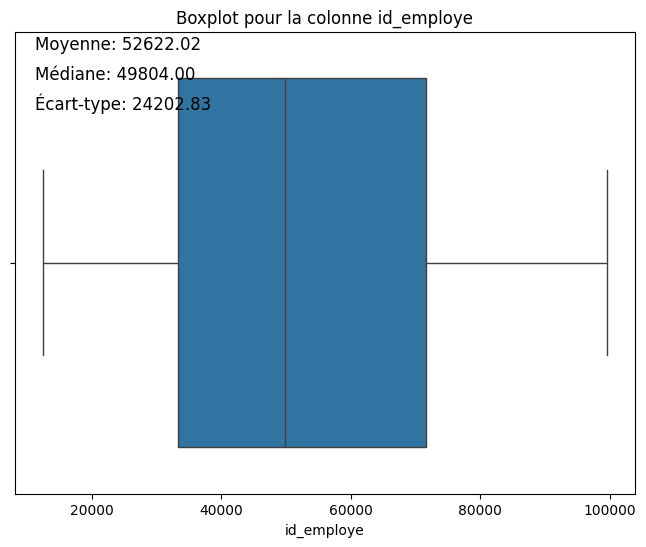

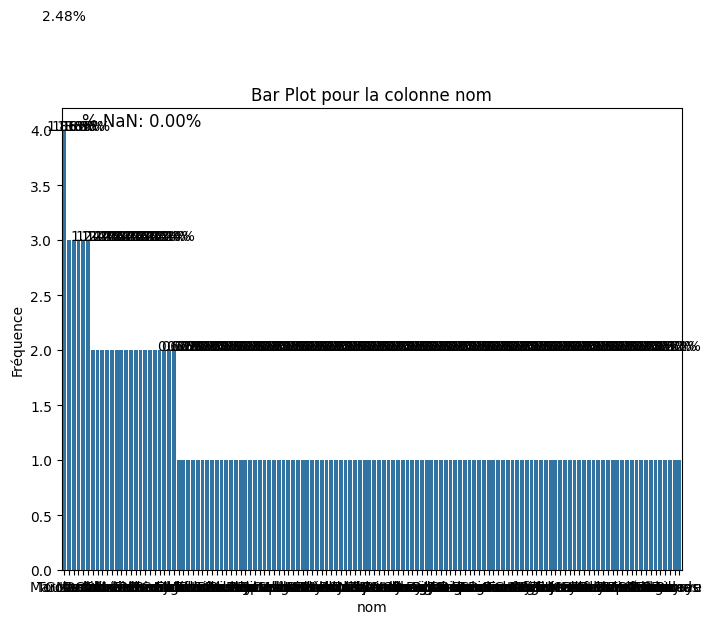

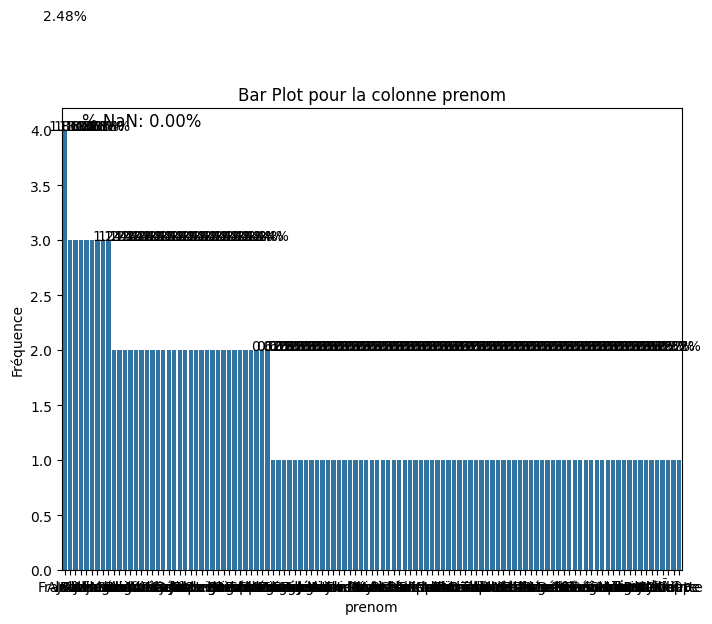

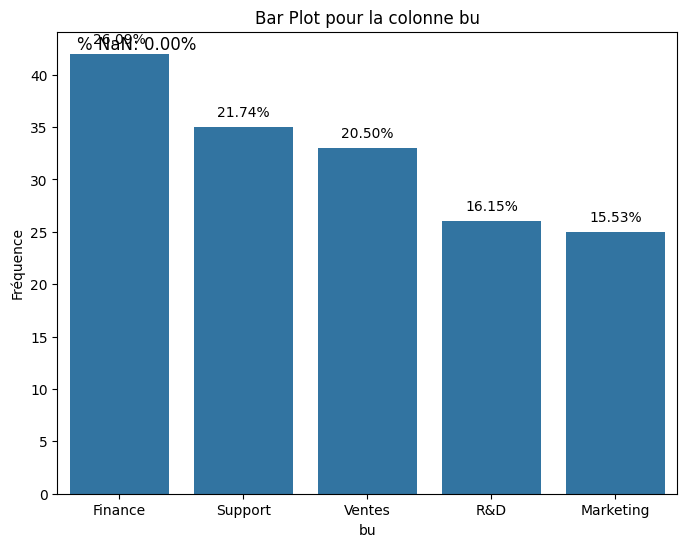

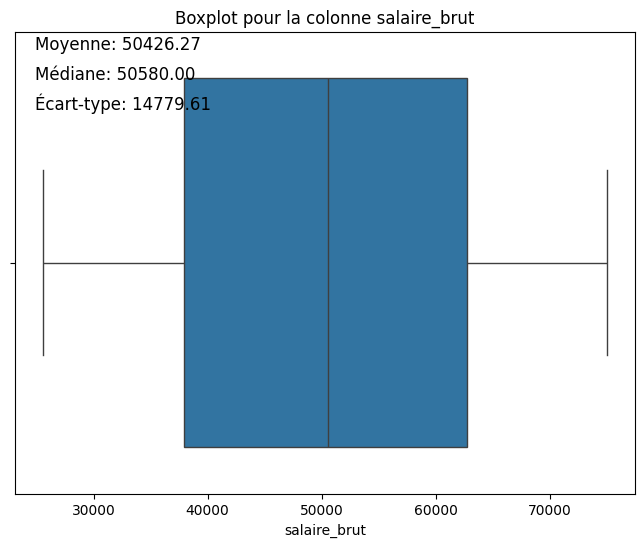

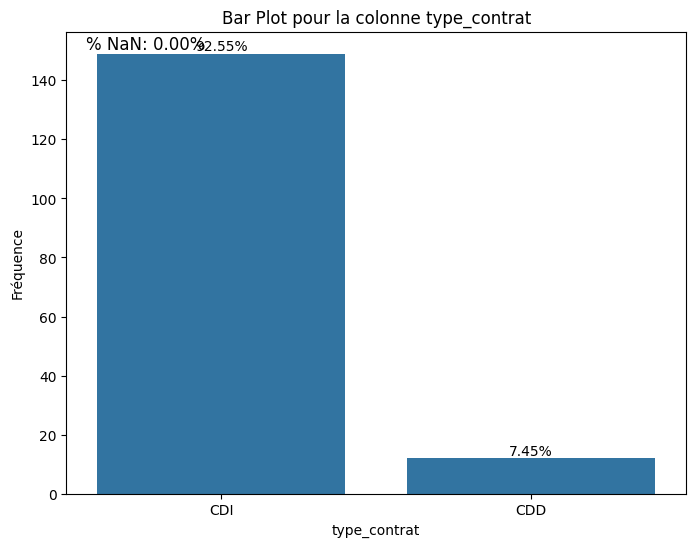

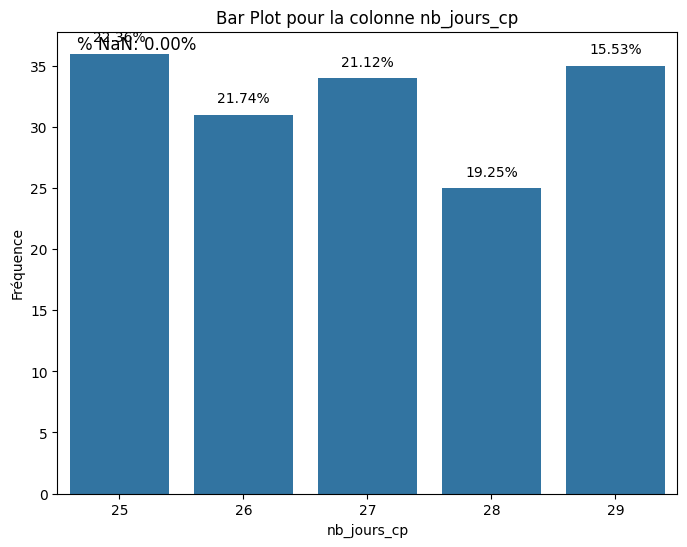

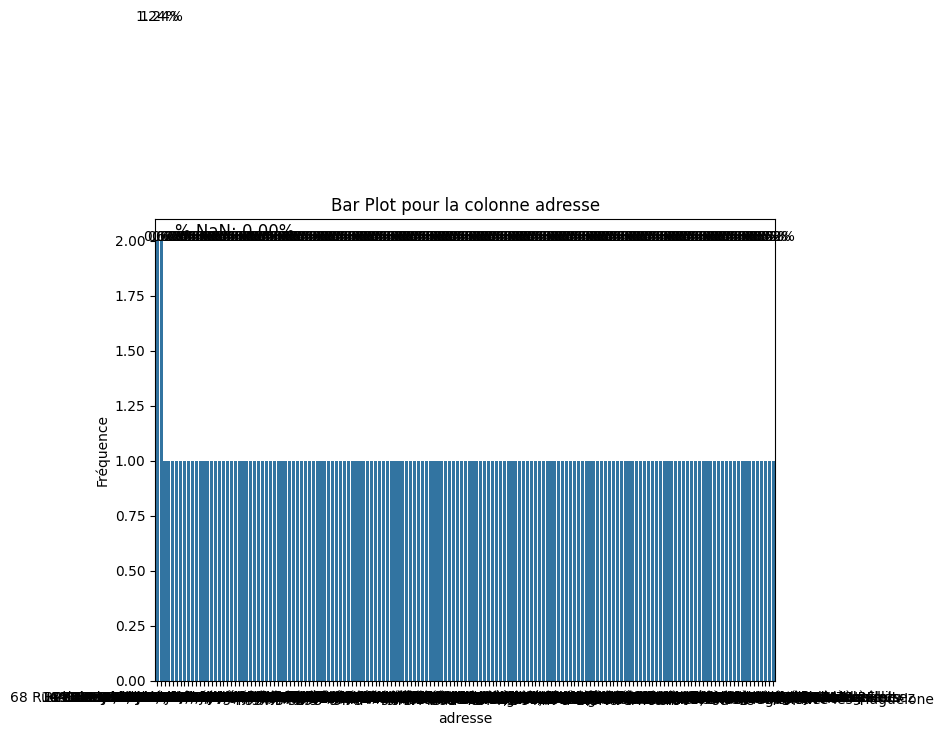

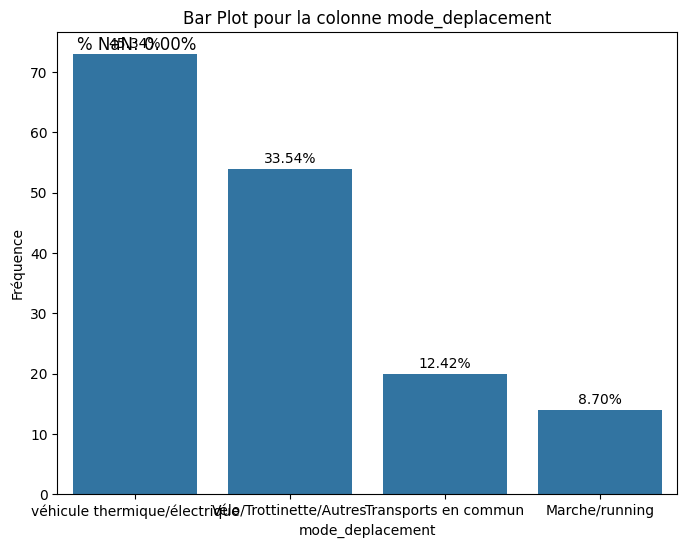

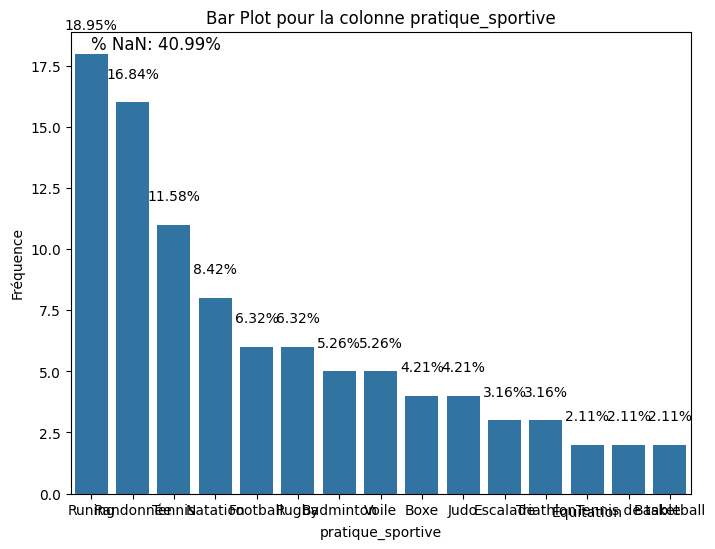

In [73]:
mf.plot_column_analysis(df_merged,column_types)

### Matrice de corrélation

In [74]:
mf.analyze_correlations(df_merged)

c:\Users\Maeva\Documents\OpenClassRoom\P12 - Gérer un projet d'infrastructure\notebooks\my_functions.py:195: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  results.append((col1, col2, p, None))
c:\Users\Maeva\Documents\OpenClassRoom\P12 - Gérer un projet d'infrastructure\notebooks\my_functions.py:195: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  results.append((col1, col2, p, None))
c:\Users\Maeva\Documents\OpenClassRoom\P12 - Gérer un projet d'infrastructure\notebooks\my_functions.py:195: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  results.append((col1, col2, p, None))
c:\Users\Maeva\Documents\OpenClassRoom\P12 - Gérer un projet d'infrastructure\notebooks\my_functions.py:195: SmallSampleW

,Colonne 1,Colonne 2,p-value,Coefficient de corrélation,Interprétation
0,id_employe,nom,0.534631,NaN,Aucune relation significative
1,id_employe,prenom,0.523466,NaN,Aucune relation significative
2,id_employe,date_naissance,0.480601,NaN,Aucune relation significative
3,id_employe,bu,0.795319,NaN,Aucune relation significative
4,id_employe,date_embauche,0.404224,NaN,Aucune relation significative
...,...,...,...,...,...
61,nb_jours_cp,mode_deplacement,0.317662,NaN,Aucune relation significative
62,nb_jours_cp,pratique_sportive,0.469376,NaN,Aucune relation significative
63,adresse,mode_deplacement,0.464582,NaN,Aucune relation significative
64,adresse,pratique_sportive,0.386477,NaN,Aucune relation significative


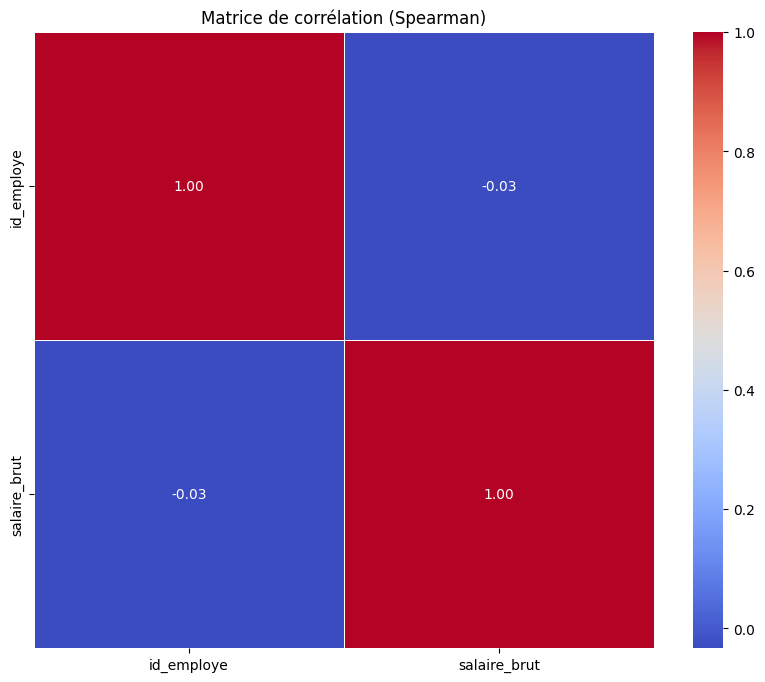

In [75]:
mf.plot_correlation_matrix(df_merged)

### Export du Dataset Final

In [76]:
df_merged.to_csv("../data/donnees_rh_clean.csv", index=False)